## Pre-Processing
### Data Loading and Cleaning

Setup and import libraries – We import the necessary Python libraries for data manipulation (pandas, numpy), visualization (matplotlib), and feature scaling (sklearn.preprocessing.MinMaxScaler). We also configure pandas display options to make it easier to view wide DataFrames.

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Display settings
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

Load and clean data – We read the NBA games CSV, sort it by date, remove unnecessary columns, and filter to keep only the last two seasons for analysis.

In [2]:
# -------------------------------
# Load CSV, sort, and filter seasons
# -------------------------------

def remove_columns(df, cols):
    return df.drop(columns=cols, errors='ignore')

def get_clean_df(csv_path="data/nba_games.csv"):
    df = pd.read_csv(csv_path, index_col=0)
    df = df.sort_values("date").reset_index(drop=True)
    df = remove_columns(df, ["mp.1", "mp_opp.1", "index_opp"])
    
    # Keep only last 2 seasons
    last_two_seasons = df['season'].unique()[-2:]
    df = df[df['season'].isin(last_two_seasons)].copy()
    return df

df = get_clean_df()
df.head()

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,gmsc,+/-,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,gmsc_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,...,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,gmsc_opp,+/-_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,mp_max_opp,mp_max_opp.1,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,gmsc_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
20410,240.0,41.0,90.0,0.456,10.0,29.0,0.345,15.0,20.0,0.750,13.0,31.0,44.0,23.0,5.0,4.0,12.0,18.0,107.0,NaN,NaN,0.541,0.511,0.322,0.222,28.3,77.5,51.2,56.1,5.2,7.0,10.8,100.0,111.1,123.6,NaN,NaN,10.0,17.0,0.750,4.0,6.0,0.667,5.0,7.0,1.0,4.0,7.0,8.0,7.0,2.0,2.0,3.0,3.0,21.0,20.3,7.0,1.014,1.000,0.75,0.636,14.2,29.0,15.4,33.9,3.2,4.9,20.0,29.8,175.0,131.0,LAL,107,0,240.0,...,91.0,0.527,14.0,34.0,0.412,9.0,12.0,0.750,9.0,33.0,42.0,29.0,9.0,6.0,12.0,15.0,119.0,NaN,NaN,0.618,0.604,0.374,0.132,22.5,71.7,48.8,60.4,9.3,9.8,11.1,100.0,123.6,111.1,NaN,NaN,12.0,22.0,1.000,3.0,9.0,0.667,2.0,4.0,1.0,3.0,10.0,13.0,11.0,3.0,1.0,3.0,5.0,29.0,29.3,15.0,1.000,1.000,1.00,0.667,9.9,34.6,22.2,45.3,4.2,7.3,25.0,62.4,200.0,123.0,DEN,119,1,2024,2023-10-24,False
20411,240.0,48.0,91.0,0.527,14.0,34.0,0.412,9.0,12.0,0.750,9.0,33.0,42.0,29.0,9.0,6.0,12.0,15.0,119.0,NaN,NaN,0.618,0.604,0.374,0.132,22.5,71.7,48.8,60.4,9.3,9.8,11.1,100.0,123.6,111.1,NaN,NaN,12.0,22.0,1.000,3.0,9.0,0.667,2.0,4.0,1.0,3.0,10.0,13.0,11.0,3.0,1.0,3.0,5.0,29.0,29.3,15.0,1.000,1.000,1.00,0.667,9.9,34.6,22.2,45.3,4.2,7.3,25.0,62.4,200.0,123.0,DEN,119,1,240.0,...,90.0,0.456,10.0,29.0,0.345,15.0,20.0,0.750,13.0,31.0,44.0,23.0,5.0,4.0,12.0,18.0,107.0,NaN,NaN,0.541,0.511,0.322,0.222,28.3,77.5,51.2,56.1,5.2,7.0,10.8,100.0,111.1,123.6,NaN,NaN,10.0,17.0,0.750,4.0,6.0,0.667,5.0,7.0,1.0,4.0,7.0,8.0,7.0,2.0,2.0,3.0,3.0,21.0,20.3,7.0,1.014,1.000,0.75,0.636,14.2,29.0,15.4,33.9,3.2,4.9,20.0,29.8,175.0,131.0,LAL,107,0,2024,2023-10-24,True
20412,240.0,42.0,95.0,0.442,11.0,33.0,0.333,13.0,17.0,0.765,17.0,43.0,60.0,23.0,5.0,7.0,19.0,22.0,108.0,NaN,NaN,0.527,0.500,0.347,0.179,35.4,70.5,55.0,54.8,4.9,12.1,15.6,100.0,106.2,102.3,NaN,NaN,13.0,22.0,1.000,3.0,9.0,1.000,3.0,5.0,1.0,4.0,11.0,14.0,8.0,1.0,3.0,6.0,5.0,32.0,23.7,7.0,1.500,1.500,1.00,1.333,14.3,31.1,22.1,41.4,16.4,12.9,38.7,30.3,300.0,112.0,PHO,108,0,240.0,...,101.0,0.356,10.0,43.0,0.233,22.0,28.0,0.786,18.0,31.0,49.0,19.0,11.0,6.0,11.0,23.0,104.0,NaN,NaN,0.459,0.406,0.426,0.277,29.5,64.6,45.0,52.8,10.8,9.7,8.8,100.0,102.3,106.2,NaN,NaN,8.0,20.0,0.667,4.0,14.0,0.500,7.0,7.0,1.0,5.0,6.0,11.0,9.0,3.0,2.0,3.0,5.0,27.0,15.8,15.0,0.799,0.833,0.70,0.750,21.3,21.5,17.3,41.5,7.9,7.7,23.7,31.5,225.0,118.0,GSW,104,1,2024,2023-10-24,True
20413,240.0,36.0,101.0,0.356,10.0,43.0,0.233,22.0,28.0,0.786,18.0,31.0,49.0,19.0,11.0,6.0,11.0,23.0,104.0,NaN,NaN,0.459,0.406,0.426,0.277,29.5,64.6,45.0,52.8,10.8,9.7,8.8,100.0,102.3,106.2,NaN,NaN,8.0,20.0,0.667,4.0,14.0,0.500,7.0,7.0,1.0,5.0,6.0,11.0,9.0,3.0,2.0,3.0,5.0,27.0,15.8,15.0,0.799,0.833,0.70,0.750,21.3,21.5,17.3,41.5,7.9,7.7,23.7,31.5,225.0,118.0,GSW,104,1,240.0,...,95.0,0.442,11.0,33.0,0.333,13.0,17.0,0.765,17.0,43.0,60.0,23.0,5.0,7.0,19.0,22.0,108.0,NaN,NaN,0.527,0.500,0.347,0.179,35.4,70.5,55.0,54.8

Create target variable – We shift the “won” column by one to create a target column representing whether the team will win the next game. Missing targets (for the last game) are filled with a placeholder.

In [3]:
# -------------------------------
# Add next-game outcome target
# -------------------------------

def add_target_column(team_df):
    team_df["target"] = team_df["won"].shift(-1)
    return team_df

def group_teams_and_add_target(df):
    df = df.groupby("team", group_keys=False).apply(add_target_column).copy()
    df["target"].fillna(2, inplace=True)  # Mark last game as 2
    df["target"] = df["target"].astype(int)
    return df

df = group_teams_and_add_target(df)
df[["team", "won", "target"]].head(15)

,team,won,target
20410,LAL,False,1
20411,DEN,True,1
20412,PHO,True,0
20413,GSW,False,1
20414,NOP,True,1
20415,BOS,True,1
20416,NYK,False,1
20417,HOU,False,0
20418,ORL,True,1
20419,UTA,False,1


Remove columns with missing values – Any columns that contain null values are removed to ensure the dataset is clean and ready for modeling.

In [4]:
# -------------------------------
# Remove columns with nulls
# -------------------------------

def remove_null_columns(df):
    null_cols = df.columns[df.isnull().any()]
    return df.drop(columns=null_cols)

df = remove_null_columns(df)
df.head()

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,gmsc_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,gmsc_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
20410,240.0,41.0,90.0,0.456,10.0,29.0,0.345,15.0,20.0,13.0,31.0,44.0,23.0,5.0,4.0,12.0,18.0,107.0,0.541,0.511,0.322,0.222,28.3,77.5,51.2,56.1,5.2,7.0,10.8,100.0,111.1,123.6,10.0,17.0,0.750,4.0,6.0,0.667,5.0,7.0,4.0,7.0,8.0,7.0,2.0,2.0,3.0,3.0,21.0,20.3,7.0,1.014,1.000,0.75,0.636,14.2,29.0,15.4,33.9,3.2,4.9,20.0,29.8,175.0,131.0,LAL,107,0,240.0,48.0,91.0,0.527,14.0,34.0,0.412,9.0,12.0,9.0,33.0,42.0,29.0,9.0,6.0,12.0,15.0,119.0,0.618,0.604,0.374,0.132,22.5,71.7,48.8,60.4,9.3,9.8,11.1,100.0,123.6,111.1,12.0,22.0,1.000,3.0,9.0,0.667,2.0,4.0,3.0,10.0,13.0,11.0,3.0,1.0,3.0,5.0,29.0,29.3,15.0,1.000,1.000,1.00,0.667,9.9,34.6,22.2,45.3,4.2,7.3,25.0,62.4,200.0,123.0,DEN,119,1,2024,2023-10-24,False,1
20411,240.0,48.0,91.0,0.527,14.0,34.0,0.412,9.0,12.0,9.0,33.0,42.0,29.0,9.0,6.0,12.0,15.0,119.0,0.618,0.604,0.374,0.132,22.5,71.7,48.8,60.4,9.3,9.8,11.1,100.0,123.6,111.1,12.0,22.0,1.000,3.0,9.0,0.667,2.0,4.0,3.0,10.0,13.0,11.0,3.0,1.0,3.0,5.0,29.0,29.3,15.0,1.000,1.000,1.00,0.667,9.9,34.6,22.2,45.3,4.2,7.3,25.0,62.4,200.0,123.0,DEN,119,1,240.0,41.0,90.0,0.456,10.0,29.0,0.345,15.0,20.0,13.0,31.0,44.0,23.0,5.0,4.0,12.0,18.0,107.0,0.541,0.511,0.322,0.222,28.3,77.5,51.2,56.1,5.2,7.0,10.8,100.0,111.1,123.6,10.0,17.0,0.750,4.0,6.0,0.667,5.0,7.0,4.0,7.0,8.0,7.0,2.0,2.0,3.0,3.0,21.0,20.3,7.0,1.014,1.000,0.75,0.636,14.2,29.0,15.4,33.9,3.2,4.9,20.0,29.8,175.0,131.0,LAL,107,0,2024,2023-10-24,True,1
20412,240.0,42.0,95.0,0.442,11.0,33.0,0.333,13.0,17.0,17.0,43.0,60.0,23.0,5.0,7.0,19.0,22.0,108.0,0.527,0.500,0.347,0.179,35.4,70.5,55.0,54.8,4.9,12.1,15.6,100.0,106.2,102.3,13.0,22.0,1.000,3.0,9.0,1.000,3.0,5.0,4.0,11.0,14.0,8.0,1.0,3.0,6.0,5.0,32.0,23.7,7.0,1.500,1.500,1.00,1.333,14.3,31.1,22.1,41.4,16.4,12.9,38.7,30.3,300.0,112.0,PHO,108,0,240.0,36.0,101.0,0.356,10.0,43.0,0.233,22.0,28.0,18.0,31.0,49.0,19.0,11.0,6.0,11.0,23.0,104.0,0.459,0.406,0.426,0.277,29.5,64.6,45.0,52.8,10.8,9.7,8.8,100.0,102.3,106.2,8.0,20.0,0.667,4.0,14.0,0.500,7.0,7.0,5.0,6.0,11.0,9.0,3.0,2.0,3.0,5.0,27.0,15.8,15.0,0.799,0.833,0.70,0.750,21.3,21.5,17.3,41.5,7.9,7.7,23.7,31.5,225.0,118.0,GSW,104,1,2024,2023-10-24,True,0
20413,240.0,36.0,101.0,0.356,10.0,43.0,0.233,22.0,28.0,18.0,31.0,49.0,19.0,11.0,6.0,11.0,23.0,104.0,0.459,0.406,0.426,0.277,29.5,64.6,45.0,52.8,10.8,9.7,8.8,100.0,102.3,106.2,8.0,20.0,0.667,4.0,14.0,0.500,7.0,7.0,5.0,6.0,11.0,9.0,3.0,2.0,3.0,5.0,27.0,15.8,15.0,0.799,0.833,0.70,0.750,21.3,21.5,17.3,41.5,7.9,7.7,23.7,31.5,225.0,118.0,GSW,104,1,240.0,42.0,95.0,0.442,11.0,33.0,0.333,13.0,17.0,17.0,43.0,60.0,23.0,5.0,7.0,19.0,22.0,108.0,0.527,0.500,0.347,0.179,35.4,70.5,55.0,54.8,4.9,12.1,15.6,100.0,106.2,102.3,13.0,22.0,1.000,3.0,9.0,1.000,3.0,5.0,4.0,11.0,14.0,8.0,1.0,3.0,6.0,5.0,32.0,23.7,7.0,1.500,1.500,1.00,1.333,14.3,31.1,22.1,41.4,16.4,12.9,38.7,30.3,300.0,112.0,PHO,108,0,2024,2023-10-24,False,1
20414,240.0,40.0,85.0,0.471,14.0,32.0,0.438,17

Scale numeric features – We normalize numeric columns using MinMax scaling so that all features are on a comparable scale, which helps machine learning models train more effectively.

In [5]:
# -------------------------------
# MinMax scale numeric columns
# -------------------------------

excluded_cols = ["season", "date", "won", "target", "team", "team_opp"]
numeric_cols = df.columns[~df.columns.isin(excluded_cols)]

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[numeric_cols].head()

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,gmsc_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,gmsc_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp
20410,0.0,0.441860,0.442308,0.434466,0.296296,0.333333,0.451718,0.340909,0.377358,0.464286,0.384615,0.411765,0.341463,0.227273,0.222222,0.321429,0.451613,0.421053,0.394456,0.380550,0.339658,0.318508,0.519266,0.587156,0.533520,0.426966,0.257426,0.205882,0.334728,0.0,0.450053,0.581493,0.285714,0.210526,0.583333,0.272727,0.15,0.556000,0.208333,0.21875,0.266667,0.20,0.148148,0.238095,0.250,0.2,0.2,0.4,0.147541,0.229277,0.413333,0.526316,0.518304,0.625187,0.079500,0.142,0.151732,0.051570,0.225995,0.033613,0.049,0.130435,0.095361,0.362245,0.566667,0.421053,0.0,0.0,0.604651,0.461538,0.606796,0.444444,0.431373,0.561375,0.204545,0.226415,0.321429,0.435897,0.372549,0.487805,0.409091,0.333333,0.321429,0.354839,0.547368,0.558635,0.577167,0.438330,0.189383,0.412844,0.480734,0.466480,0.487360,0.460396,0.288235,0.347280,0.0,0.581493,0.450053,0.380952,0.342105,1.000000,0.181818,0.30,0.556000,0.083333,0.12500,0.200000,0.35,0.333333,0.428571,0.375,0.1,0.2,0.8,0.278689,0.388007,0.520000,0.512671,0.518304,1.000000,0.083375,0.099,0.218638,0.127803,0.359485,0.044118,0.073,0.184783,0.515464,0.489796,0.477778,0.547368,1.0
20411,0.0,0.604651,0.461538,0.606796,0.444444,0.431373,0.561375,0.204545,0.226415,0.321429,0.435897,0.372549,0.487805,0.409091,0.333333,0.321429,0.354839,0.547368,0.558635,0.577167,0.438330,0.189383,0.412844,0.480734,0.466480,0.487360,0.460396,0.288235,0.347280,0.0,0.581493,0.450053,0.380952,0.342105,1.000000,0.181818,0.30,0.556000,0.083333,0.12500,0.200000,0.35,0.333333,0.428571,0.375,0.1,0.2,0.8,0.278689,0.388007,0.520000,0.512671,0.518304,1.000000,0.083375,0.099,0.218638,0.127803,0.359485,0.044118,0.073,0.184783,0.515464,0.489796,0.477778,0.547368,1.0,0.0,0.441860,0.442308,0.434466,0.296296,0.333333,0.451718,0.340909,0.377358,0.464286,0.384615,0.411765,0.341463,0.227273,0.222222,0.321429,0.451613,0.421053,0.394456,0.380550,0.339658,0.318508,0.519266,0.587156,0.533520,0.426966,0.257426,0.205882,0.334728,0.0,0.450053,0.581493,0.285714,0.210526,0.583333,0.272727,0.15,0.556000,0.208333,0.21875,0.266667,0.20,0.148148,0.238095,0.250,0.2,0.2,0.4,0.147541,0.229277,0.413333,0.526316,0.518304,0.625187,0.079500,0.142,0.151732,0.051570,0.225995,0.033613,0.049,0.130435,0.095361,0.362245,0.566667,0.421053,0.0
20412,0.0,0.465116,0.538462,0.400485,0.333333,0.411765,0.432079,0.295455,0.320755,0.607143,0.692308,0.725490,0.341463,0.227273,0.388889,0.571429,0.580645,0.431579,0.364606,0.357294,0.387097,0.256815,0.649541,0.458716,0.639665,0.408708,0.242574,0.355882,0.535565,0.0,0.398528,0.357518,0.428571,0.342105,1.000000,0.181818,0.30,1.000000,0.125000,0.15625,0.266667,0.40,0.370370,0.285714,0.125,0.3,0.5,0.8,0.327869,0.289242,0.413333,1.000000,1.000000,1.000000,0.166625,0.143,0.176822,0.126682,0.313817,0.172269,0.129,0.333696,0.101804,1.000000,0.355556,0.431579,0.0,0.0,0.325581,0.653846,0.191748,0.296296,0.607843,0.268412,0.500000,0.528302,0.642857,0.384615,0.5098

Visualize home vs away performance – We calculate and plot the win percentage for games played at home versus away to see if home-court advantage is significant.

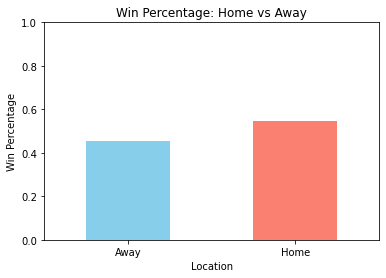

In [6]:
# -------------------------------
# Compare win % Home vs Away
# -------------------------------

win_pct = df.groupby("home")["won"].mean()
plt.figure(figsize=(6,4))
win_pct.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Win Percentage: Home vs Away")
plt.xlabel("Location")
plt.ylabel("Win Percentage")
plt.xticks(ticks=[0,1], labels=['Away', 'Home'], rotation=0)
plt.ylim(0,1)
plt.show()

Calculate rolling 10-game averages – For each team, we compute the rolling averages of numeric stats over the past 10 games. These rolling features summarize recent performance and will be used to predict the outcome of the next game.

In [7]:
# -------------------------------
# Rolling 10-game averages
# -------------------------------

def compute_rolling_features(df, columns, window=10):
    def rolling_avg(team):
        return team.shift().rolling(window, min_periods=1).mean()
    
    rolling_df = df[columns + ["won", "team", "season"]]
    rolling_df = rolling_df.groupby(["team", "season"], group_keys=False).apply(rolling_avg)
    rolling_cols = [f"{col}_{window}" for col in rolling_df.columns]
    rolling_df.columns = rolling_cols
    df = pd.concat([df, rolling_df], axis=1)
    df = df.dropna()
    return df, rolling_cols

df, rolling_cols = compute_rolling_features(df, list(numeric_cols))
df[rolling_cols].head()

,mp_10,fg_10,fga_10,fg%_10,3p_10,3pa_10,3p%_10,ft_10,fta_10,orb_10,drb_10,trb_10,ast_10,stl_10,blk_10,tov_10,pf_10,pts_10,ts%_10,efg%_10,3par_10,ftr_10,orb%_10,drb%_10,trb%_10,ast%_10,stl%_10,blk%_10,tov%_10,usg%_10,ortg_10,drtg_10,fg_max_10,fga_max_10,fg%_max_10,3p_max_10,3pa_max_10,3p%_max_10,ft_max_10,fta_max_10,orb_max_10,drb_max_10,trb_max_10,ast_max_10,stl_max_10,blk_max_10,tov_max_10,pf_max_10,pts_max_10,gmsc_max_10,+/-_max_10,ts%_max_10,efg%_max_10,3par_max_10,ftr_max_10,orb%_max_10,drb%_max_10,trb%_max_10,ast%_max_10,stl%_max_10,blk%_max_10,tov%_max_10,usg%_max_10,ortg_max_10,drtg_max_10,total_10,home_10,mp_opp_10,fg_opp_10,fga_opp_10,fg%_opp_10,3p_opp_10,3pa_opp_10,3p%_opp_10,ft_opp_10,fta_opp_10,orb_opp_10,drb_opp_10,trb_opp_10,ast_opp_10,stl_opp_10,blk_opp_10,tov_opp_10,pf_opp_10,pts_opp_10,ts%_opp_10,efg%_opp_10,3par_opp_10,ftr_opp_10,orb%_opp_10,drb%_opp_10,trb%_opp_10,ast%_opp_10,stl%_opp_10,blk%_opp_10,tov%_opp_10,usg%_opp_10,ortg_opp_10,drtg_opp_10,fg_max_opp_10,fga_max_opp_10,fg%_max_opp_10,3p_max_opp_10,3pa_max_opp_10,3p%_max_opp_10,ft_max_opp_10,fta_max_opp_10,orb_max_opp_10,drb_max_opp_10,trb_max_opp_10,ast_max_opp_10,stl_max_opp_10,blk_max_opp_10,tov_max_opp_10,pf_max_opp_10,pts_max_opp_10,gmsc_max_opp_10,+/-_max_opp_10,ts%_max_opp_10,efg%_max_opp_10,3par_max_opp_10,ftr_max_opp_10,orb%_max_opp_10,drb%_max_opp_10,trb%_max_opp_10,ast%_max_opp_10,stl%_max_opp_10,blk%_max_opp_10,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,won_10,season_10
20439,0.0,0.465116,0.538462,0.400485,0.333333,0.411765,0.432079,0.295455,0.320755,0.607143,0.692308,0.725490,0.341463,0.227273,0.388889,0.571429,0.580645,0.431579,0.364606,0.357294,0.387097,0.256815,0.649541,0.458716,0.639665,0.408708,0.242574,0.355882,0.535565,0.0,0.398528,0.357518,0.428571,0.342105,1.000000,0.181818,0.30,1.000000,0.125000,0.15625,0.266667,0.40,0.370370,0.285714,0.125,0.3,0.5,0.8,0.327869,0.289242,0.413333,1.000000,1.000000,1.000000,0.166625,0.143,0.176822,0.126682,0.313817,0.172269,0.129,0.333696,0.101804,1.000000,0.355556,0.431579,0.0,0.0,0.325581,0.653846,0.191748,0.296296,0.607843,0.268412,0.500000,0.528302,0.642857,0.384615,0.509804,0.243902,0.500000,0.333333,0.285714,0.612903,0.389474,0.219616,0.158562,0.537002,0.397418,0.541284,0.350459,0.360335,0.380618,0.534653,0.285294,0.251046,0.0,0.357518,0.398528,0.190476,0.289474,0.445000,0.272727,0.55,0.333333,0.291667,0.21875,0.333333,0.15,0.259259,0.333333,0.375,0.2,0.2,0.8,0.245902,0.149912,0.520000,0.316764,0.357418,0.550225,0.093750,0.213,0.062127,0.072870,0.314988,0.082983,0.077,0.170652,0.117268,0.617347,0.422222,0.389474,1.0,1.0,2024.0
20440,0.0,0.441860,0.442308,0.434466,0.296296,0.333333,0.451718,0.340909,0.377358,0.464286,0.384615,0.411765,0.341463,0.227273,0.222222,0.321429,0.451613,0.421053,0.394456,0.380550,0.339658,0.318508,0.519266,0.587156,0.533520,0.426966,0.257426,0.205882,0.334728,0.0,0.450053,0.581493,0.285714,0.210526,0.583333,0.272727,0.15,0.556000,0.208333,0.21875,0.266667,0.20,0.148148,0.238095,0.250,0.2,0.2,0.4,0.147541,0.229277,0.413333,0.526316,0.518304,0.625187,0.079500,0.142,0.151732,0.051570,0.225995,0.033613,0.049,0.130435,0.095361,0.362245,0.566667,0.421053,0.0,0.0,0.604651,0.461538,0.606796,0.444444,0.431373,0.561375,0.204545,0.226415,0.321429,0.435897,0.372549,0.487805,0.409091,0.333333,0.321429,0.354839,0.547368,0.558635,0.577167,0.438330,0.189383,0.412844,0.480734,0.466480,0.487360,0.460396,0.288235,0.347280,0.0,0.581493,0.450053,0.380952,0.342105,1.000000,0.181818,0.30,0.556000,0.083333,0.12500,0.200000,0.35,0.333333,0.428571,0.375,0.1,0.2,0.8,0.278689,0.388007,0.520000,0.512671,0.518304,1.000000,0.083375,0.099,0.218638,0.127803,0.359485,0.044118,0.073,0.184783,0.515464,0.489796,0.477778,0.547368,1.0,0.0,2024.0
20442,0.0,0.465116,0.384615,0.500000,0.259259,0.431373,0.320786,0.522727,0.490566,0.607143,0.615385,0.666667,0.243902,0.363636,0.333333,0.464286,0.516129,0.515789,0.496802,0.429175,0.470588,0.428981,0.761468,0.726606,0.9

Visualize win probability by recent performance – We group games into bins based on the last 10-game win percentage (won_10) and plot the empirical win percentage for each bin to see how past performance affects the probability of winning the next game.

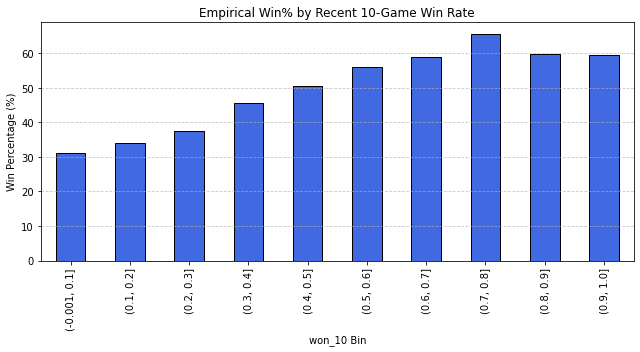

In [8]:
# -------------------------------
# Visualize empirical win % by rolling 10
# -------------------------------

bins = np.arange(0, 1.1, 0.1)
won_10_bins = pd.cut(df['won_10'], bins=bins, include_lowest=True)
win_rate_by_bin = df.groupby(won_10_bins)['won'].mean() * 100

win_rate_by_bin.plot(kind='bar', color='royalblue', edgecolor='black', figsize=(9,5))
plt.title('Empirical Win% by Recent 10-Game Win Rate')
plt.ylabel('Win Percentage (%)')
plt.xlabel('won_10 Bin')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Add next game information – We create columns containing information about the next game (opponent, location, date) for each team, which will be used to merge opponent features and prepare data for modeling.

In [9]:
# -------------------------------
# Add next game info per team
# -------------------------------

def add_next_game_cols(df, cols):
    for col in cols:
        df[f"{col}_next"] = df.groupby("team", group_keys=False)[col].apply(lambda x: x.shift(-1))
    return df

df = add_next_game_cols(df, ["home", "team_opp", "date"])
df[["team", "date", "team_opp_next", "home_next"]].head(15)

,team,date,team_opp_next,home_next
20439,PHO,2023-10-26,UTA,1.0
20440,LAL,2023-10-26,SAC,0.0
20442,ORL,2023-10-27,LAL,0.0
20443,POR,2023-10-27,PHI,0.0
20444,MEM,2023-10-27,WAS,0.0
20445,GSW,2023-10-27,HOU,0.0
20446,UTA,2023-10-27,PHO,0.0
20447,HOU,2023-10-27,GSW,1.0
20448,SAS,2023-10-27,LAC,0.0
20449,LAC,2023-10-27,SAS,1.0


Combine team and opponent stats – We merge the rolling stats of the opponent for the next game so that each row contains both the team’s recent stats and the opponent’s recent stats. This allows the model to consider both sides when predicting game outcomes.

In [10]:
# -------------------------------
# Merge opponent rolling stats for next game
# -------------------------------

full = df.merge(
    df[rolling_cols + ["team_opp_next", "date_next", "team"]],
    left_on=["team", "date_next"],
    right_on=["team_opp_next", "date_next"]
)

# Cleanup object columns
removed_object_cols = list(full.select_dtypes("object").columns) + excluded_cols
selected_columns = full.columns[~full.columns.isin(removed_object_cols)]
full[selected_columns].head()

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,gmsc_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,...,tov%_max_10_y,usg%_max_10_y,ortg_max_10_y,drtg_max_10_y,total_10_y,home_10_y,mp_opp_10_y,fg_opp_10_y,fga_opp_10_y,fg%_opp_10_y,3p_opp_10_y,3pa_opp_10_y,3p%_opp_10_y,ft_opp_10_y,fta_opp_10_y,orb_opp_10_y,drb_opp_10_y,trb_opp_10_y,ast_opp_10_y,stl_opp_10_y,blk_opp_10_y,tov_opp_10_y,pf_opp_10_y,pts_opp_10_y,ts%_opp_10_y,efg%_opp_10_y,3par_opp_10_y,ftr_opp_10_y,orb%_opp_10_y,drb%_opp_10_y,trb%_opp_10_y,ast%_opp_10_y,stl%_opp_10_y,blk%_opp_10_y,tov%_opp_10_y,usg%_opp_10_y,ortg_opp_10_y,drtg_opp_10_y,fg_max_opp_10_y,fga_max_opp_10_y,fg%_max_opp_10_y,3p_max_opp_10_y,3pa_max_opp_10_y,3p%_max_opp_10_y,ft_max_opp_10_y,fta_max_opp_10_y,orb_max_opp_10_y,drb_max_opp_10_y,trb_max_opp_10_y,ast_max_opp_10_y,stl_max_opp_10_y,blk_max_opp_10_y,tov_max_opp_10_y,pf_max_opp_10_y,pts_max_opp_10_y,gmsc_max_opp_10_y,+/-_max_opp_10_y,ts%_max_opp_10_y,efg%_max_opp_10_y,3par_max_opp_10_y,ftr_max_opp_10_y,orb%_max_opp_10_y,drb%_max_opp_10_y,trb%_max_opp_10_y,ast%_max_opp_10_y,stl%_max_opp_10_y,blk%_max_opp_10_y,tov%_max_opp_10_y,usg%_max_opp_10_y,ortg_max_opp_10_y,drtg_max_opp_10_y,total_opp_10_y,home_opp_10_y,won_10_y,season_10_y
0,0.0,0.279070,0.269231,0.347087,0.259259,0.372549,0.361702,0.409091,0.433962,0.357143,0.589744,0.509804,0.170732,0.318182,0.166667,0.750000,0.548387,0.294737,0.351812,0.304440,0.455408,0.407461,0.416514,0.688073,0.606145,0.300562,0.336634,0.161765,0.753138,0.0,0.253417,0.304942,0.476190,0.500000,0.333333,0.090909,0.25,1.000000,0.416667,0.40625,0.266667,0.4,0.259259,0.095238,0.375,0.1,0.7,0.8,0.442623,0.248677,0.560000,0.366472,0.325626,1.00000,0.125000,0.134,0.145759,0.068386,0.039813,0.053571,0.066,0.456522,0.301546,0.301020,0.277778,0.294737,0.0,0.0,0.325581,0.326923,0.368932,0.111111,0.333333,0.168576,0.522727,...,0.282609,0.143041,0.229592,0.622222,0.494737,1.0,0.0,0.581395,0.673077,0.446602,0.629630,0.764706,0.497545,0.386364,0.377358,0.535714,0.358974,0.431373,0.487805,0.272727,0.444444,0.321429,0.677419,0.663158,0.492537,0.471459,0.677419,0.281205,0.519266,0.361468,0.374302,0.505618,0.292079,0.373529,0.292887,0.0,0.621451,0.456362,0.333333,0.236842,1.000000,0.363636,0.300,0.666667,0.250000,0.218750,0.400000,0.150,0.296296,0.238095,0.250,0.2,0.20,0.6,0.344262,0.365079,0.506667,0.512671,0.518304,1.00000,0.062500,0.1690,0.789725,0.308296,0.268150,0.064076,0.0660,0.184783,0.112113,0.510204,0.477778,0.663158,0.0,0.0,2024.0
1,0.0,0.325581,0.326923,0.368932,0.111111,0.333333,0.168576,0.522727,0.547170,0.285714,0.461538,0.372549,0.365854,0.636364,0.388889,0.464286,0.612903,0.347368,0.343284,0.268499,0.383302,0.494978,0.311927,0.583486,0.393855,0.575843,0.673267,0.411765,0.476987,0.0,0.304942,0.253417,0.285714,0.210526,0.445000,0.000000,0.20,0.333333,0.375000,0.31250,0.200000,0.3,0.296296,0.333333,0.375,0.3,0.4,0.8,0.295082,0.403880,0.626667,0.417154,0.357418,0.50075,0.083375,0.095,0.292712,0.154709,0.377049,0.084034,0.077,1.000000,0.064433,0.147959,0.266667,0.347368,1.0,0.0,0.279070,0.269231,0.347087,0.259259,0.372549,0.361702,0.409091,...,0.184783,0.112113,0.510204,0.477778,0.663158,0.0,0.0,0.441860,0.461538,0.422330,0.259259,0.313725,0.412439,0.522727,0.584906,0.571429,0.564103,0.607843,0.317073,0.272727,0.111111,0.392857,0.516129,0.494737,0.402985,0.357294,0.313093,0.489240,0.638532,0.480734,0.625698,0.393258,0.292079,0.114706,0.376569,0.0,0.456362,0.621451,0.190476,0.184211,0.666667,0.090909,0.150,0.333333,0.250000,0.250000,0.266667,0.250,0.259259,0.190476,0.250,0.1,0.30,0.6,0.196721,0.185185,0.346667,0.317739,0.325626,0.40030,0.097250,0.4320,0.25328

Rolling Differences – Calculate the difference between a team’s rolling stats over the last 10 games and their next opponent’s rolling stats. This captures whether a team is stronger or weaker than the upcoming opponent in recent form.

In [11]:
# Compute differences between team and opponent rolling stats
rolling_diff_cols = []
for col in rolling_cols:
    if "_10" in col:
        opp_col = col.replace("_10", "_10_y")  # opponent's column
        diff_col = f"{col}_diff"
        full[diff_col] = full[col] - full[opp_col]
        rolling_diff_cols.append(diff_col)

KeyError: 'mp_10'

To make sure that the model does not see future data, the data has to contain only current and past data. Therefore, we must only contain the input data from the user (current data) and past statistics from previous games.

Save processed dataset – We save the final, cleaned, and feature-engineered dataset to a pickle file so it can be quickly loaded later for training models without repeating preprocessing steps.

In [12]:
full.to_pickle('data/df_nba_games.pkl')
print("Data saved to df_nba_games.pkl")

Data saved to df_nba_games.pkl
